In [15]:
import torch.utils.data as data
import torchvision.transforms as transforms
import torch.nn as nn
import torch
import torchvision.datasets as dsets
import numpy as np
import matplotlib.pyplot as plt
import scipy
import torch.nn.functional as F

** Loading Dataset **

In [2]:
train_dataset= dsets.MNIST(root='./data', train= True, transform= transforms.ToTensor(), download= False)

In [3]:
test_dataset=  dsets.MNIST(root='./data', train= False, transform= transforms.ToTensor())

In [4]:
len(test_dataset)

10000

** Making Dataset Iterable**

In [5]:
batch_size= 32
num_epochs= 15

In [6]:
train_loader= data.DataLoader(dataset= train_dataset, batch_size= batch_size, shuffle= True)

test_loader= data.DataLoader(dataset= test_dataset, batch_size=batch_size, shuffle=False)

valid_loader= data.DataLoader(train_dataset, batch_size)

torch.Size([32, 1, 28, 28])
tensor(2)


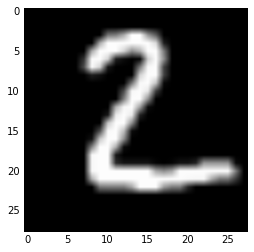

In [7]:
for x,y in test_loader:
    plt.imshow(x.data[1].numpy().reshape(28,28),cmap='gray')
    bakarax = x.data[1]
    bakaray = y.data[0]
    print(x.size()) # givs [ batch_size, channels, height, width]
    print(y.data[1])
    break

** Create Class Model **

In [8]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel,self).__init__()
        self.linear= nn.Linear(input_dim, output_dim)
        #self.sigmoid= nn.Sigmoid()
        
    def forward(self,x):
        out= self.linear(x)
        #return self.sigmoid(out)
        return out
    

** Instatiate Model Class **

In [9]:
input_dim= 28 * 28
output_dim= 10
model = LogisticRegressionModel(input_dim, output_dim)

** Instantiate Loss Class ** 

In [10]:
criterion= nn.CrossEntropyLoss()

** Instantiate Optimizer Class **

In [11]:
learning_rate= 0.001
optimizer= torch.optim.RMSprop(model.parameters(), learning_rate)


In [12]:
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


** Train the model **

In [13]:
import time
def train(net, batch_size, n_epochs, lr= learning_rate, criterion= criterion, optimizer= optimizer):
    
    #Print all the hyperparameters of the training iteration:
    print("====================== Hyperparameters =====================")
    print("      Batch_size: {}   Epochs: {}    Learning_rate {}".format(batch_size, n_epochs, lr))
    print("=" * 60)
    
    #Time for printing
    training_start_time= time.time()
    
    for epoch in range(n_epochs):
        
        running_loss= 0.0
        total_train_loss= 0.0
        #print_every= n_batches // 10 # Counter to print loss after every 10 batches
        
        for i, (images, labels) in enumerate(train_loader):
            
            batch_start_time= time.time()
        
            images= images.view(-1,28*28)
            
            #Forward + Backward + Optimize
            optimizer.zero_grad()
            outputs= net(images)
            loss= criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            #Statistics
            running_loss += loss.data.item()
          
    
    test(model)

In [14]:
def test(net, loader= test_loader):
    
    correct= 0.0
    total= 0
    
    for images, labels in test_loader:
        images= images.view(-1,28*28)
        output= net(images)
        _,predict= torch.max(output.data, 1)
        
        correct += (predict == labels.data).sum()
        total += labels.size(0)
        
    accuracy =  correct * 100. / len(test_dataset)
    print("\nTest Accuracy {:.5f}\n".format(accuracy))
        

In [51]:
train(model, batch_size, num_epochs, learning_rate)
#test(model, loader= test_loader)

====================== Hyperparameters =====================
      Batch_size: 32   Epochs: 15    Learning_rate 0.001
Epoch 1, train_loss:  0.02, Time-taken: 0.005 seconds
Epoch 2, train_loss:  0.00, Time-taken: 0.000 seconds
Epoch 3, train_loss:  0.00, Time-taken: 0.000 seconds
Epoch 4, train_loss:  0.00, Time-taken: 0.000 seconds
Epoch 5, train_loss:  0.00, Time-taken: 0.000 seconds
Epoch 6, train_loss:  0.00, Time-taken: 0.000 seconds
Epoch 7, train_loss:  0.00, Time-taken: 0.000 seconds
Epoch 8, train_loss:  0.00, Time-taken: 0.000 seconds
Epoch 9, train_loss:  0.00, Time-taken: 0.001 seconds
Epoch 10, train_loss:  0.00, Time-taken: 0.000 seconds
Epoch 11, train_loss:  0.00, Time-taken: 0.000 seconds
Epoch 12, train_loss:  0.01, Time-taken: 0.000 seconds
Epoch 13, train_loss:  0.00, Time-taken: 0.000 seconds
Epoch 14, train_loss:  0.00, Time-taken: 0.000 seconds
Epoch 15, train_loss:  0.00, Time-taken: 0.000 seconds
Training Time 62.52455377578735

Test Accuracy 92.00000



** Extract Weights of the model**

params= list(model.parameters())
print("Length of parameters" + str(len(params)))

#print weights
w= params[0]
w= w.detach().numpy()
#plt.imshow(w.reshape(-1,np.sqrt(784)),cmap='gray')

#let idx be the class index we want to visualize
idx= 5
plt.imshow(w[idx].reshape(-1,28),cmap='gray')

#print bias

b= params[1]
b= b.detach().numpy()
print(b.shape)
plt.imshow(b.reshape(10,1), cmap='gray')
plt.show()

** Adversarial Example generation ** 

Let us make the test data as adversarial examples


In [ ]:
def adv_attack(net, loader= test_loader, epsilon= 0.1):
    adv_samples= []
    target_tensor= []
    model.eval()
    
    for inputs, targets in loader:
        if cuda:
            inputs, targets = inputs.cuda(), targets.cuda()
            

In [36]:
def adv_attack(net,loader= test_loader, epsilon= 0.1 ):
    correct= 0
    total= 0
    sfmax = nn.Softmax(dim = 1)
    mean_probs1 = 0
    mean_probs2 = 0
    for i , (x,y_true) in enumerate(test_loader):
        x= torch.tensor(x.view(-1,28*28), requires_grad= True)
        y_true= torch.tensor(y_true, requires_grad= False)
        
        #clear gradient w.r.t parameters
        optimizer.zero_grad()
        
        # Forward pass to get output
        outputs1= model(x)
        ''' probs1 = sfmax(outputs1)
        probs1 = probs1[list(range(len(y_true))), y_true]
        mean_probs1 += torch.sum(probs1)'''
        #Calculate loss: Softmax-> cross entropy loss
        #first parameter must be net output and second parameter must be target 
        #loss= criterion(output, target)
        loss= criterion(outputs1, y_true)
        
        #Getting gradients w.r.t parameters
        loss.backward()
        
        #Add perturbation
        x_grad= torch.sign(x.grad.data)
        x_adversarial= torch.clamp(x.data + epsilon * x_grad, 0 ,1)
       
        #Let's now predict after perturbation
        
        outputs2 = model(x_adversarial)
        _,y_preds_adversarial= torch.max(outputs2.data, 1)        
        
        probs2 = sfmax(outputs2)
        probs2 = probs2[list(range(len(y_true))), y_preds_adversarial]
        #print(probs2)
        mean_probs2 += torch.sum(probs2)

        total += y_true.size(0)
        correct += (y_preds_adversarial == y_true).sum()



    accuracy= 100.0 *correct/total
    #mean_probs1 = mean_probs1 / total
    mean_probs2 = mean_probs2 / total

    print("epsilon: {} Adversarial Accuracy: {} Average confidence: {}".format( epsilon,accuracy, mean_probs2.item()))
        

In [54]:
epsilon= [0.01 * i for i in range(26)]
for eps in epsilon:
    adv_attack(model, test_loader, eps)

epsilon: 0.0 Adversarial Accuracy: 92 Average confidence: 0.921708881855011
epsilon: 0.01 Adversarial Accuracy: 83 Average confidence: 0.8580259084701538
epsilon: 0.02 Adversarial Accuracy: 64 Average confidence: 0.7953418493270874
epsilon: 0.03 Adversarial Accuracy: 41 Average confidence: 0.7803449034690857
epsilon: 0.04 Adversarial Accuracy: 22 Average confidence: 0.8106436729431152
epsilon: 0.05 Adversarial Accuracy: 12 Average confidence: 0.8460173010826111
epsilon: 0.06 Adversarial Accuracy: 7 Average confidence: 0.8731659054756165
epsilon: 0.07 Adversarial Accuracy: 3 Average confidence: 0.8930716514587402
epsilon: 0.08 Adversarial Accuracy: 1 Average confidence: 0.9068219661712646
epsilon: 0.09 Adversarial Accuracy: 0 Average confidence: 0.9171125888824463
epsilon: 0.1 Adversarial Accuracy: 0 Average confidence: 0.9243960976600647
epsilon: 0.11 Adversarial Accuracy: 0 Average confidence: 0.9297208189964294
epsilon: 0.12 Adversarial Accuracy: 0 Average confidence: 0.9336494207382